## Model Building


### PSEUDO CODE

1. Charger les données d'entraînement et de test
   - test_data = Charger 'data/energy_test.csv'

2. Nettoyer les données
   - Retirer les lignes avec 'Energy_type' égal à 'all_energy_types' dans test_data
   - Supprimer les lignes avec des valeurs manquantes dans test_data et test_data

3. Sélectionner les caractéristiques à utiliser pour le clustering
   - features = extraire 'CO2_emission' et 'Energy_production' de test_data

4. Normaliser les données de features
   - scaler = Créer un objet StandardScaler
   - features_scaled = Appliquer scaler.fit_transform(features)

5. Initialiser le modèle K-Means avec des paramètres de base
   - kmeans = Initialiser KMeans avec 'k-means++', max_iter=300, random_state=42

6. Définir une grille de recherche pour le nombre de clusters (n_clusters)
   - param_grid = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

7. Appliquer GridSearchCV pour optimiser le nombre de clusters
   - grid_search = GridSearchCV avec kmeans, param_grid, cv=3
   - grid_search.fit(features_scaled)

8. Extraire le meilleur modèle K-Means basé sur la recherche
   - best_kmeans = grid_search.best_estimator_

9. Prédire les clusters pour les données d'entraînement
   - clusters = best_kmeans.predict(features_scaled)

10. Ajouter les résultats des clusters au DataFrame d'entraînement
    - test_data['Cluster'] = clusters

11. Visualiser les clusters
    - Créer un graphique de dispersion avec features_scaled (CO2_emission vs Energy_production)
    - Colorier les points selon les clusters
    - Afficher les centres des clusters en rouge
    - Ajouter une légende avec les types d'énergie
    - Afficher le graphique

### CODE

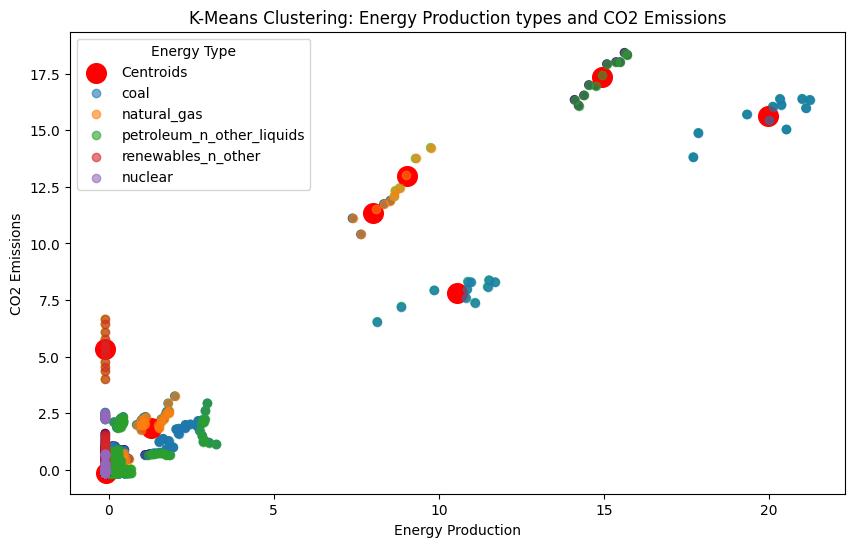

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Read the training data from CSV file
test_data = pd.read_csv('data/energy_test.csv')

# Filter data to exclude 'all_energy_types' and handle missing values
test_data = test_data[test_data['Energy_type'] != 'all_energy_types'].reset_index(drop=True)
test_data = test_data.dropna().reset_index(drop=True)

# Select features for clustering (CO2 emission and Energy production)
features = test_data[['CO2_emission', 'Energy_production']]

# Standardize features for better clustering performance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize KMeans model with specific parameters
kmeans = KMeans(init='k-means++', max_iter=300, random_state=42)

# Define a grid of hyperparameters to search for the best number of clusters
param_grid = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform GridSearchCV to find the optimal number of clusters with 3-fold cross-validation
grid_search = GridSearchCV(kmeans, param_grid, cv=3)
grid_search.fit(features_scaled)

# Get the best KMeans model from the grid search
best_kmeans = grid_search.best_estimator_

# Predict cluster labels for each data point
clusters = best_kmeans.predict(features_scaled)

# Add a new column 'Cluster' to the training data with predicted cluster labels
test_data['Cluster'] = clusters

# Create a scatter plot for visualization
plt.figure(figsize=(10, 6))

# Scatter plot points based on their scaled features and assigned clusters
scatter = plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis')

# Plot the centroids of each cluster in red
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')

# Get unique energy types from the data
energy_types = test_data['Energy_type'].unique()

# Plot data points colored by their corresponding energy types with transparency
for energy_type in energy_types:
    idx = test_data[test_data['Energy_type'] == energy_type].index
    plt.scatter(features_scaled[idx, 0], features_scaled[idx, 1], label=energy_type, alpha=0.6)

# Add labels and title for the plot
plt.title('K-Means Clustering: Energy Production types and CO2 Emissions')
plt.xlabel('Energy Production')
plt.ylabel('CO2 Emissions')
plt.legend(title='Energy Type')
plt.show()

## Metrics

- Silhouette

Le Silhouette Score évalue la cohésion interne des clusters et la séparation entre les clusters. Le score varie entre -1 et 1. Un score proche de 1 signifie que les points sont bien regroupés dans leurs clusters, tandis qu'un score proche de -1 signifie qu'un point pourrait être mal classé.

In [2]:
sil_score = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.8279959063150041


- Inertie

L'inertie mesure la somme des distances au carré entre chaque point et le centre de son cluster. Moins l'inertie est élevée, mieux les points sont regroupés autour des centres des clusters.

Une valeur plus basse indique une meilleure séparation entre les clusters.

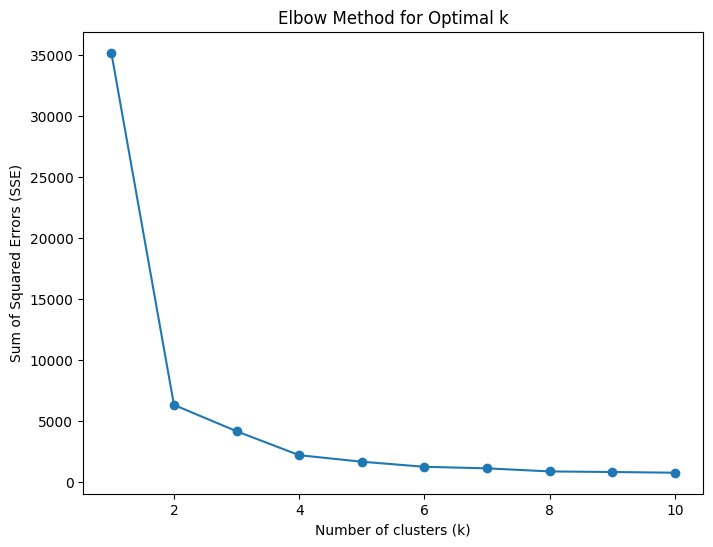

In [3]:
# Load training data
test_data = pd.read_csv('data/energy_training.csv')

# Clean data by removing rows with 'all_energy_types'
test_data = test_data[test_data['Energy_type'] != 'all_energy_types'].reset_index(drop=True)
test_data = test_data.dropna().reset_index(drop=True)

# Select features for clustering
features = test_data[['CO2_emission', 'Energy_production']]

# Scale the features for better performance of K-Means
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculate SSE (Inertia) for different k values
sse = []
k_range = range(1, 11)  # Testing k from 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE (Inertia) vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()